0) Preprocess + EDA + feature selection
1) Extract input and output columns
2) Scale the values
3) Train test split
4) Train the model
5) Evaluate the model/model selection
6) Deploy the model

# Step 0: Preprocess + EDA + feature selection

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.info() # info about every coulmn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [4]:
df.head() # to get the overview of any dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df = df.iloc[:,1:] # preprocessing

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


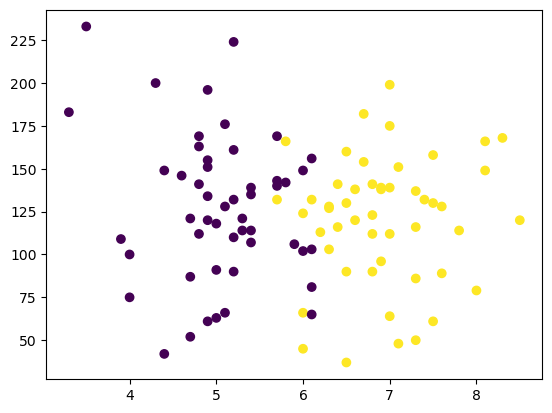

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])  # yellow - placement done

# Step 1: Extract input and output columns

In [8]:
# X independent , y dependent
X = df.iloc[:,0:2] # input

In [9]:
y = df.iloc[:,-1] # output

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
y.shape

(100,)

# Step 3: Train test split

In [13]:
from sklearn.model_selection import train_test_split
# train_test_split(X,y,test_size=0.1) # (independent variable, dependent variable, size of testing set)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train # 90 rows × 2 columns but randomly

,cgpa,iq
17,3.3,183.0
12,5.4,139.0
20,6.6,120.0
89,4.9,151.0
46,5.3,114.0
...,...,...
68,4.0,75.0
92,5.2,110.0
9,5.1,66.0
13,6.4,116.0


In [15]:
X_test

,cgpa,iq
83,7.5,130.0
51,4.8,141.0
48,6.6,138.0
41,5.4,114.0
74,6.7,154.0
30,7.6,128.0
16,5.2,224.0
39,4.6,146.0
56,6.1,65.0
80,4.9,196.0


In [16]:
y_test

83    1
51    0
48    1
41    0
74    1
30    1
16    0
39    0
56    0
80    0
Name: placement, dtype: int64

# Step 2: Scale the values

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train # convert from data frame to array 

array([[-2.35300717,  1.58195272],
       [-0.52062829,  0.45280118],
       [ 0.52644536, -0.03478699],
       [-0.95690897,  0.7607516 ],
       [-0.60788442, -0.1887622 ],
       [-0.69514056,  1.01737695],
       [-0.7823967 ,  1.40231498],
       [-0.69514056,  0.27316343],
       [ 0.70095764,  0.50412625],
       [-0.25885987,  0.27316343],
       [ 0.43918922, -0.80466305],
       [ 2.18431197, -0.03478699],
       [ 0.00290854, -1.95947713],
       [ 0.43918922, -2.16477741],
       [ 1.39900673, -0.83032558],
       [ 0.09016468, -0.47105009],
       [ 0.00290854,  0.70942653],
       [ 0.6137015 ,  1.55629019],
       [-0.95690897, -1.54887657],
       [-1.04416511,  1.22267723],
       [ 1.13723832, -0.90731319],
       [-0.52062829, -0.36839995],
       [ 0.70095764, -0.80466305],
       [ 1.3117506 , -1.54887657],
       [ 0.09016468,  0.27316343],
       [ 1.57351901, -0.1887622 ],
       [-0.95690897,  0.86340174],
       [ 1.13723832, -0.13743713],
       [ 1.3117506 ,

In [20]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.3117506 ,  0.22183836],
       [-1.04416511,  0.50412625],
       [ 0.52644536,  0.42713864],
       [-0.52062829, -0.1887622 ],
       [ 0.6137015 ,  0.8377392 ],
       [ 1.39900673,  0.17051329],
       [-0.69514056,  2.63411667],
       [-1.21867738,  0.63243892],
       [ 0.09016468, -1.44622643],
       [-0.95690897,  1.91556568]])

# Step 4: Train the model

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() # clf (classifier) object of LogisticRegression class

In [22]:
clf.fit(X_train,y_train)

LogisticRegression()

# Step 5: Evaluate the model

In [23]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [24]:
y_test

83    1
51    0
48    1
41    0
74    1
30    1
16    0
39    0
56    0
80    0
Name: placement, dtype: int64

In [25]:
y_pred = clf.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) # (actual test output, model prediction)

0.9

In [ ]:
!pip install mlxtend

In [28]:
# To visulaize what pattern did the model learn 
from mlxtend.plotting import plot_decision_regions

<Axes: >

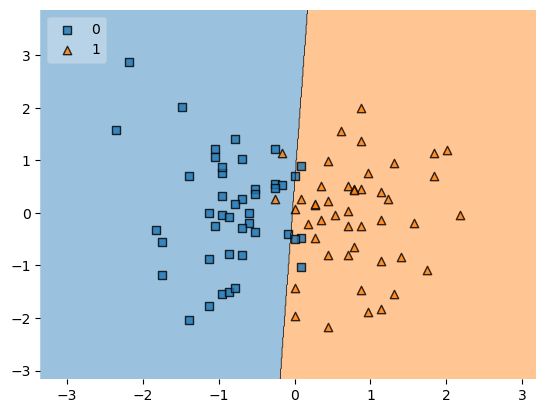

In [29]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [30]:
import pickle

In [31]:
pickle.dump(clf,open('model.pkl','wb')) # create ml model file